# 선형회귀분석

## Boston Housing Dataset

![title](img/house_001.png)

In [1]:
# 필요 라이브러리 로드
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 import
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

## EDA (Explore Data Analysis)

In [3]:
# column 확인
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# 기초통계값 확인
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
# null 갯수 확인
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

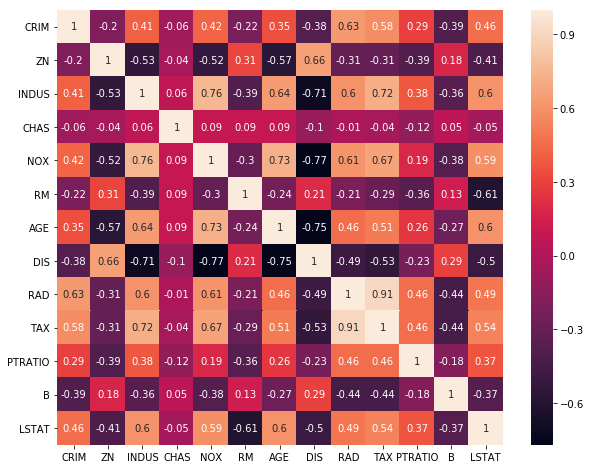

In [7]:
# heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## 데이터 준비

In [8]:
X_train = boston['LSTAT'].values.reshape([-1, 1])
y_train = boston_dataset.target.reshape([-1, 1])

In [9]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (506, 1)
y_train shape: (506, 1)


In [10]:
def weight_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial, name='weight')

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial, name='bias')

$$Y = W^{T}X + b$$

In [11]:
# 변수 초기화
with tf.name_scope('scope_LinearRegression'):
    w = weight_variable([1, 1])
    b = bias_variable([1])

    x = tf.placeholder(tf.float32, shape=[None, 1])
    y = x * w + b
    y_t = tf.placeholder(tf.float32, shape=[None, 1])

손실함수(loss function)는 평균제곱오차(MSE, Mean Square Error)를 활용합니다.

$$MSE = \frac{1}{2m} \sum_{n=1}^{N} (t_{n} - y_{n})^2$$
$$\underset{w, b}{\operatorname{argmin}}{MSE}$$

In [12]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y_t - y))
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
    tf.summary.scalar('loss', loss) # 텐서보드에서 확인할 값

In [13]:
# 초기화
epochs = 10000
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    writer = tf.summary.FileWriter('./board/test', sess.graph)
    merged_summary = tf.summary.merge_all()
    
    # 학습과정 시각화를 위한 리스트
    w_list = []
    b_list = []

    for epoch in range(epochs):
        if (epoch)%2500 == 0: # epoch 10번마다 저장
            w_list.append(sess.run(w))
            b_list.append(sess.run(b))
            print("[Epoch: {}] w: {}, b: {}".format(epoch, sess.run(w), sess.run(b)))
        
        # tensorboard에 기록
        history, _ = sess.run([merged_summary, train_step], feed_dict={x: X_train, y_t: y_train})
        writer.add_summary(history, epoch)

[Epoch: 0] w: [[0.]], b: [0.]
[Epoch: 2500] w: [[-0.32768896]], b: [24.1876]
[Epoch: 5000] w: [[-0.7629745]], b: [31.43786]
[Epoch: 7500] w: [[-0.8938163]], b: [33.617203]


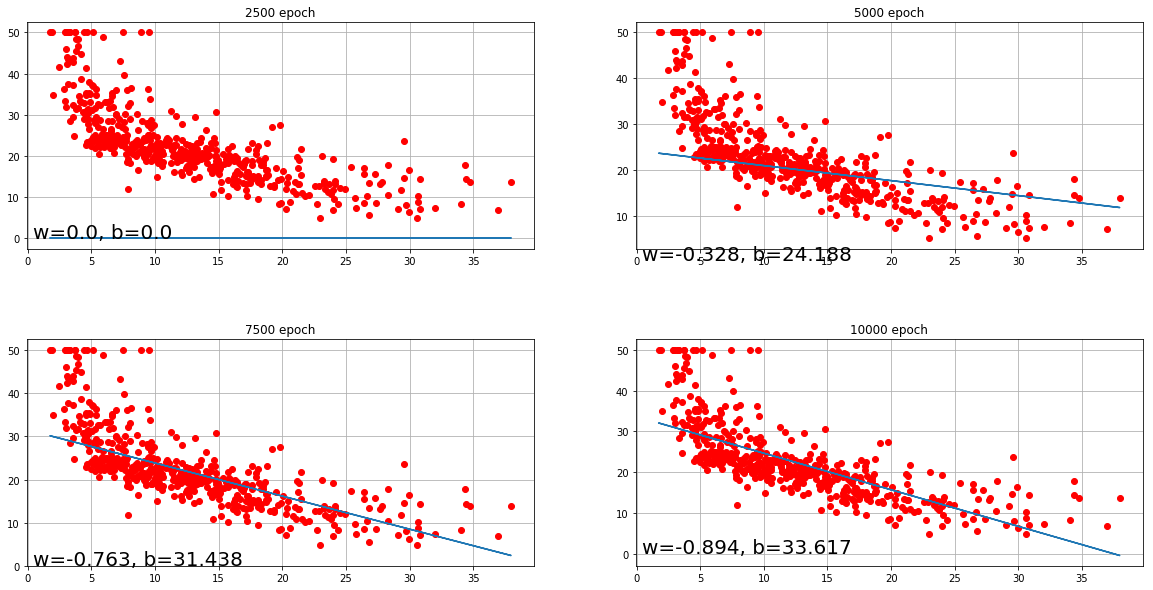

In [14]:
# 학습과정 시각화
def visualize(X_train, y_train, w_list, b_list, index):
    plt.subplot(2, 2, index+1)
    plt.title('{} epoch'.format(2500*(index+1)))
    plt.plot(X_train, y_train, 'ro')
    plt.plot(X_train, w_list[index][0] * X_train + b_list[index][0])
    plt.text(0.4, 0.2, 'w={}, b={}'.format(round(float(w_list[index][0]), 3), round(float(b_list[index][0]), 3)),
             fontsize=20)
    plt.grid(True)
# Setting
plt.figure(figsize=(20, 10))
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
plt.subplots_adjust(hspace = .4)

for index in range(4):
    visualize(X_train, y_train, w_list, b_list, index)
plt.show()

In [15]:
!tensorboard --logdir=./board/test

TensorBoard 1.14.0 at http://gwonhyeogmin-ui-MacBookPro.local:6006/ (Press CTRL+C to quit)
I0919 14:11:05.344851 123145420984320 _internal.py:122] ::ffff:192.168.100.129 - - [19/Sep/2019 14:11:05] "GET / HTTP/1.1" 200 -
I0919 14:11:05.551888 123145426239488 _internal.py:122] ::ffff:192.168.100.129 - - [19/Sep/2019 14:11:05] "GET /font-roboto/oMMgfZMQthOryQo9n22dcuvvDin1pK8aKteLpeZ5c0A.woff2 HTTP/1.1" 200 -
I0919 14:11:06.287194 123145426239488 _internal.py:122] ::ffff:192.168.100.129 - - [19/Sep/2019 14:11:06] "GET /data/environment HTTP/1.1" 200 -
I0919 14:11:06.289562 123145436749824 _internal.py:122] ::ffff:192.168.100.129 - - [19/Sep/2019 14:11:06] "GET /data/runs HTTP/1.1" 200 -
I0919 14:11:06.290446 123145447260160 _internal.py:122] ::ffff:192.168.100.129 - - [19/Sep/2019 14:11:06] "GET /data/experiments HTTP/1.1" 200 -
I0919 14:11:06.291633 123145420984320 _internal.py:122] ::ffff:192.168.100.129 - - [19/Sep/2019 14:11:06] "GET /data/plugins_listing HTTP/1.1" 200 -
I0919 14:11:0

출처
* https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155